# Individual household power consumption Data Set

**Abstract**: Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.


## Data Set Information

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).

**Notes:**
1. (global_active_power · 1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but *for some timestamps, the measurement values are missing*: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

## Attribute Information

1. **date**: Date in format dd/mm/yyyy

2. **time**: time in format hh:mm:ss

3. **global_active_power**: household global minute-averaged active power (in kilowatt)

4. **global_reactive_power**: household global minute-averaged reactive power (in kilowatt)

5. **voltage**: minute-averaged voltage (in volt)

6. **global_intensity**: household global minute-averaged current intensity (in ampere)

7. **sub_metering_1**: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8. **sub_metering_2**: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9. **sub_metering_3**: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.



In [65]:
import pandas as pd
df = pd.read_csv("data.csv", delimiter=";")
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


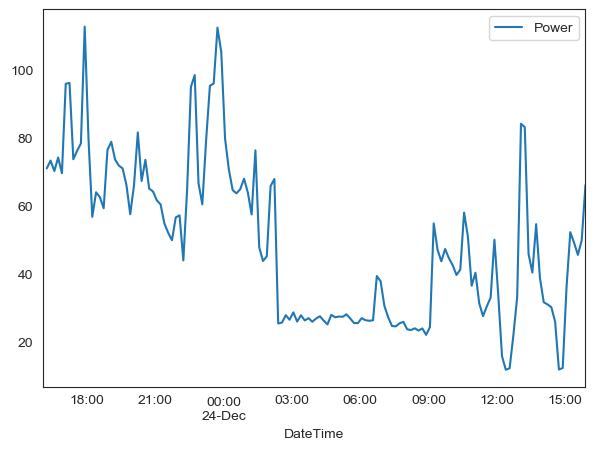

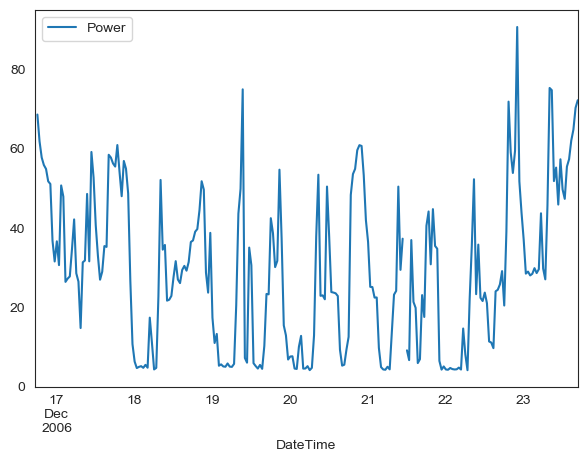

In [176]:
import numpy as np
from datetime import date
import calendar

def print_graph(start, skip, n):
    df.replace({'?': np.nan}, regex=False, inplace=True)
    global_power_dict = {'DateTime' : df.Date.astype(str)[start:start+n].apply(lambda s : s + " ") + df.Time[start:start+n], 'Power' : df.Global_active_power[start:start+n].astype(float).apply(lambda x : x * 1000 / 60)}
    global_power = pd.DataFrame(global_power_dict)

    global_power.DateTime = pd.to_datetime(global_power.DateTime,format= '%d/%m/%Y %H:%M:%S')
    global_power.Power = global_power.Power.rolling(skip).mean()
    global_power = global_power.iloc[::skip]

    import matplotlib.pyplot as plt
    global_power.plot(x="DateTime", y="Power")
    plt.show()
    

print_graph(10000, 10, 1440)
print_graph(0, 40, 1440 * 7)

